<a href="https://colab.research.google.com/github/isnanmulia/colab-machinelearning/blob/main/ML_KMeans_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial uses codes from these sources, with several adjustments:
- https://realpython.com/k-means-clustering-python/

In [2]:
# Importing the libraries
# if there is a problem when importing kneed, execute following line
!pip install --upgrade kneed

import numpy as np
import pandas as pd
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

In [3]:
# Loading dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url, names=names)
# print(dataset.describe())
dataset_attr = dataset[['sepal-length','sepal-width','petal-length','petal-width']]
print(dataset_attr.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
# Training the KMeans model - 1-run only
kmeans = KMeans(init="random", n_clusters=3, n_init=10)
kmeans.fit(dataset_attr)

KMeans(init='random', n_clusters=3, n_init=10)

In [5]:
# Showing the details of KMeans model
print(kmeans.inertia_)          # Sum of Squared Error (SSE)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.labels_)

78.940841426146
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
8
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


[680.8244000000001, 152.36870647733906, 78.940841426146, 57.317873214285704, 46.53558205128205, 38.95701115711986, 36.816467765567765, 30.216786825895532, 28.022628851540624, 26.926653846153847]


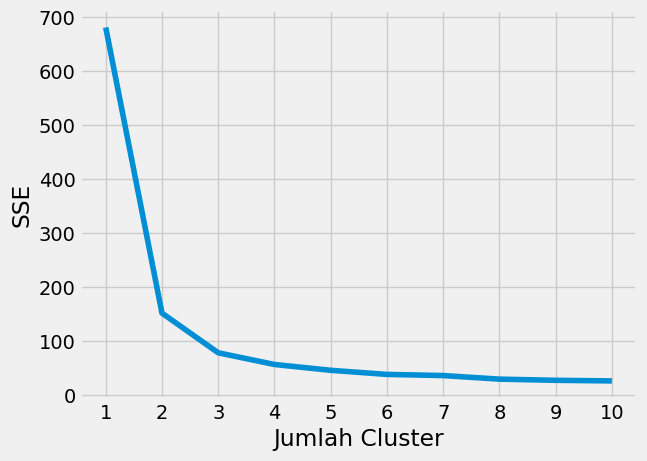

3


In [6]:
# Evaluating the KMeans model - SSE
# Rebuild KMeans model with various k
kmeans_kwargs = { "init": "random", "n_init": 10, }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(dataset_attr)
  sse.append(kmeans.inertia_)

print(sse)

# Plot the SSE values
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Jumlah Cluster")
plt.ylabel("SSE")
plt.show()

# Use KneeLocator
kl = KneeLocator( x=range(1, 11), y=sse, curve="convex", direction="decreasing")
print(kl.elbow)

[0.6808136202936816, 0.5525919445499757, 0.4978256901095472, 0.4897430308769174, 0.48383853845695607, 0.35643288150748426, 0.3480542242352121, 0.32209535436584674, 0.30860552135661373]


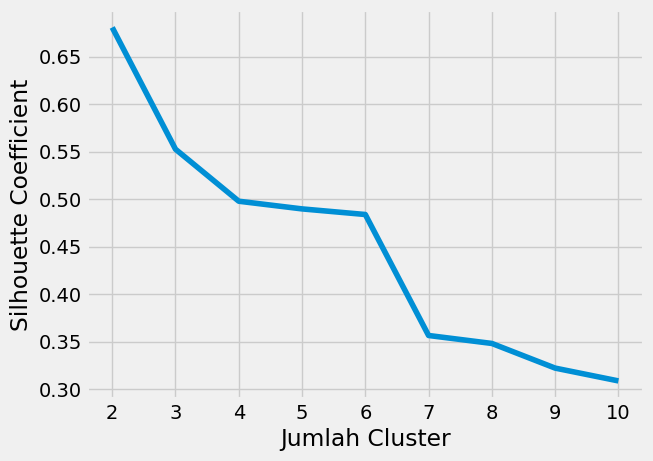

In [8]:
# Evaluating the KMeans model - Silhouette Coefficient
# Rebuild KMeans model with various k
kmeans_kwargs = { "init": "random", "n_init": 10, }
silhouette_coefficients = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(dataset_attr)
  score = silhouette_score(dataset_attr, kmeans.labels_)
  silhouette_coefficients.append(score)

print(silhouette_coefficients)

# Plot the Silhouette Coefficients
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()